In [2]:
import numpy as np
import scipy.ndimage.morphology as scm
import matplotlib.pyplot as plt
from matplotlib import pyplot
import os

os.chdir("/home/guillaume/Documents/DL-normalization")

/home/guillaume/anaconda3/envs/DL-normalization/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
Y = np.load("data/processed/nemo_bnd_perten_final190_samples_standardize/train/Y/NORSSH_BND_PERTEN0_norm_coeffs.npz")['arr_0']

In [7]:
Yp = np.where(Y == 0, -1, 1)
Ynew = Yp

H, W = Yp.shape
for i in range(H):
    for j in range(W):
        if Yp[i,j] == -1 :
            exception = False
            if i == H-1:        
                if j == W-1:
                    if Yp[i-1, j] == 1 or Yp[i, j-1] == 1 :
                        Ynew[i,j] = 0            
                elif j == 0:
                    if Yp[(i-1) % H,j] == 1 or Yp[i, j+1] == 1 :
                        Ynew[i,j] = 0  
                else:
                    if Yp[i-1,j] == 1 or Yp[i, j+1] == 1 or Yp[i, j-1 ] == 1 :
                        Ynew[i,j] = 0

            elif i == 0:             
                if j == W-1:
                    if Yp[i+1, j] == 1 or Yp[i, j-1] == 1 :
                        Ynew[i,j] = 0
                elif j == 0:
                    if Yp[i+1,j] == 1 or Yp[i, j+1] == 1 :
                        Ynew[i,j] = 0  
                else:
                    if Yp[i+1, j] == 1 or Yp[i, j+1] == 1 or Yp[i, j-1] == 1 :
                        Ynew[i,j] = 0
                        
            elif j == W-1:
                if i == H-1:
                    if Yp[i-1, j] == 1 or Yp[i, j-1] == 1 :
                        Ynew[i,j] = 0
                elif i == 0:
                    if Yp[i+1, j] == 1 or Yp[i, j-1] == 1 :
                        Ynew[i,j] = 0  
                else:
                    if Yp[i-1,j] == 1 or Yp[i+1, j] == 1 or Yp[i, j-1 ] == 1 :
                        Ynew[i,j] = 0
            
            elif j == 0:
                if i == H-1:
                    if Yp[i-1, j] == 1 or Yp[i, j+1] == 1 :
                        Ynew[i,j] = 0   
                elif i == 0:
                    if Yp[i+1, j] == 1 or Yp[i, j+1] == 1 :
                        Ynew[i,j] = 0  
                else:
                    if Yp[i-1,j] == 1 or Yp[i+1, j] == 1 or Yp[i, j+1 ] == 1 :
                        Ynew[i,j] = 0
                        
            else :
                if Yp[i+1,j] == 1 or Yp[i-1, j] == 1 or Yp[i, j+1] == 1 or Yp[i, j-1] == 1 :
                    Ynew[i,j] = 0

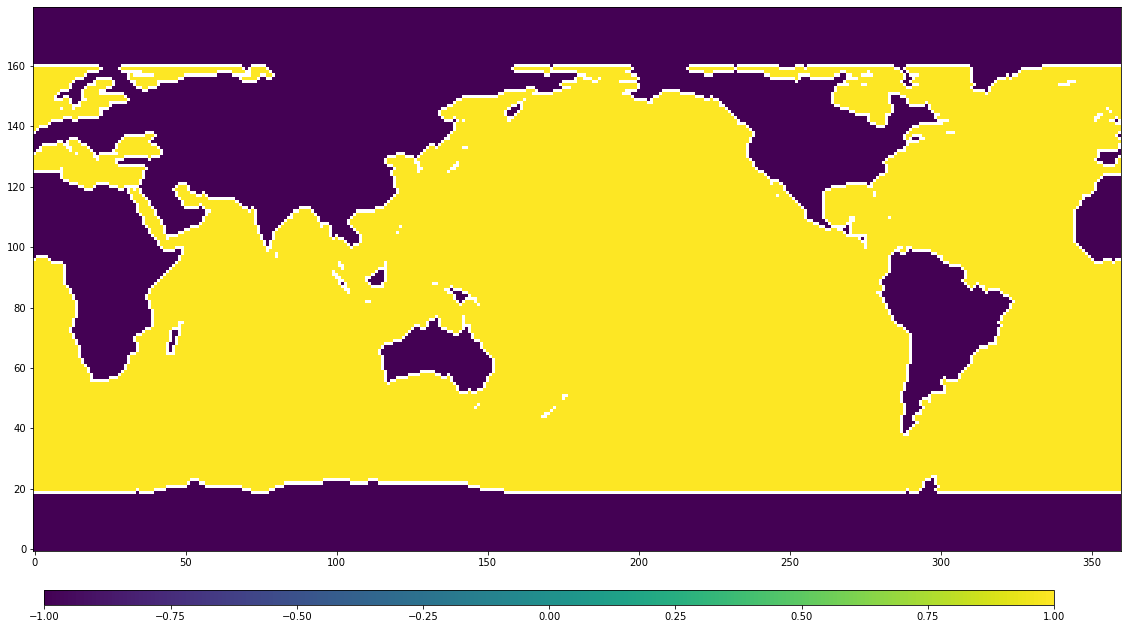

In [8]:
fig,axs = plt.subplots(figsize=(30, 10),ncols=1)
c = axs.imshow(np.ma.masked_array(Ynew, np.where(Ynew==0,True,False)),origin="lower")
cbar_ax = fig.add_axes([0.266, 0.05, 0.4673, 0.02])
plt.colorbar(c,cax=cbar_ax,orientation='horizontal')
plt.show()

In [9]:
new = Ynew
new =  np.where(Ynew==0, -1, 1)

In [10]:
dist_map = scm.distance_transform_bf(~new,metric='cityblock')
dist_map = np.where(Ynew==-1,dist_map*-1,dist_map)

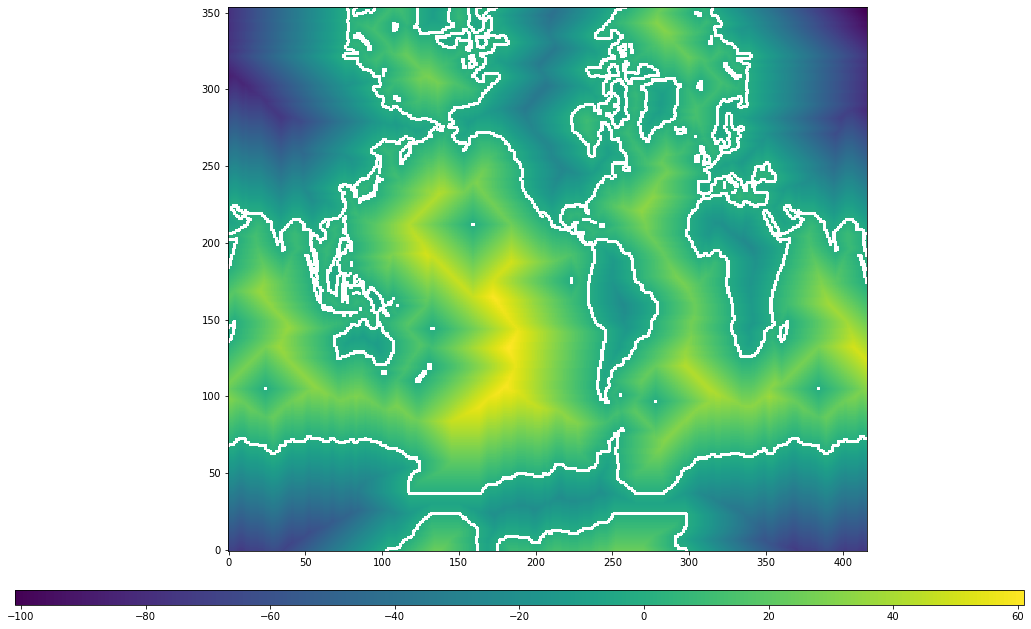

In [15]:
fig,axs = plt.subplots(figsize=(30, 10),ncols=1)
c = axs.imshow(np.ma.masked_array(dist_map, np.where(dist_map==0,True,False)),origin="lower")
cbar_ax = fig.add_axes([0.266, 0.05, 0.4673, 0.02])
cb = plt.colorbar(c,cax=cbar_ax,orientation='horizontal')
plt.show()